In [178]:
import sys
print("Python: {}". format(sys.version))

Python: 3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]


In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
#import of data in csv file from github
#comma separated

In [181]:
url = "https://github.com/QuarKUS7/EY/blob/master/train.csv"
data = pd.read_csv("/home/peter/EY/train.csv", sep=',')

In [182]:
data.shape

(891, 12)

In [183]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [185]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Meet and Greet data.
1. **Sex** is the dependent variable. It is a nominal binary variable of two values: Male and Female.
2. **PassengerID** is a numerial variable. It seems to be random and unique for every passanger.
3. **Survived** is a nominal binary variable of values: 0 for not survived and 1 for survived.
4. **Pclass** is an ordinal variable of values: 1 for upper class, 2 for middle class and 3 for lower class. It approximates economic and social status of given passanger.
5. **Name** is disregarded.
6. **Age** is a quantitative and continous variable.
7. **SibSp** is a quantitative variable representing number of siblings or spouses on board.
8. **Parch** is a quantitative variable representing number of related parents/childern on board.
9. **Ticket** is a variable that similarly to PassengerID, seems to be random and unique for all passangers.
10. **Fare** is a quantitative variable that represents how much each passenger paid for the ticket.
11. **Cabin** is a varibale representing cabin number of each passenger.
12. **Embarked** is a categorical variable that represents the port of embarkation.

In [186]:
data = data.drop(['PassengerId','Name'], axis=1)

In [187]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are some 177 missing values in Age, 682 in Cabin and 2 in Embarked. Unfortunately, Cabin is missing 77% of it values so it will be difficult to use it meaningfuly. Fortunately, there are no missing values for Sex. 
We have to keep in mind this in train/test spliting so we stratifie missing values into both sets.

In [188]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is quite a range of fares in Fare variable. There are no extreme outliers in other variables.

In [189]:
print("Men on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'male']), len(data[data['Sex'] == 'male'])/len(data)*100))
print("Women on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'female']), len(data[data['Sex'] == 'female'])/len(data)*100))

Men on board: 577 (64.76 percent)
Women on board: 314 (35.24 percent)


There are 577 men on board which means that if our clasifier predicts that everyone is men than we would get 64.76 % accurency. This might serve as our baseline model.

In [190]:
men = data[data['Sex'] == 'male']
women = data[data['Sex'] == 'female']

In [191]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [192]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S


/home/peter/anaconda3/envs/datas/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: num must be 1 <= num <= 1, not 2

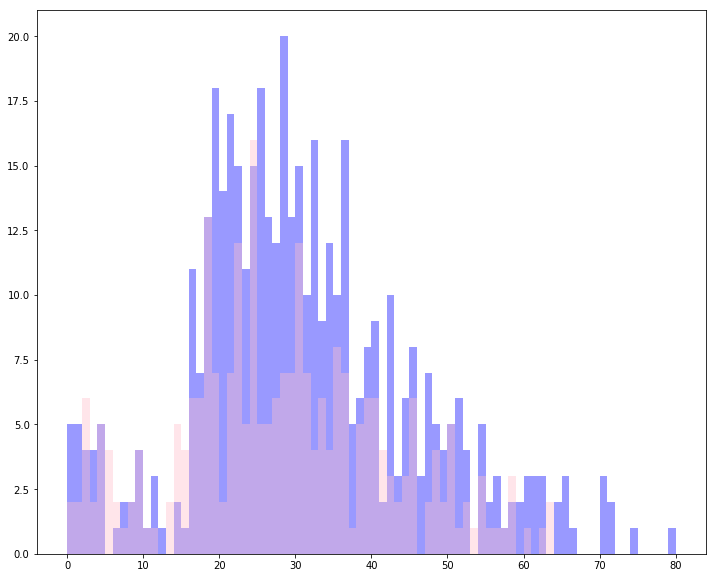

In [152]:
plt.figure(figsize=[12,10])
plt.subplot(111)
sns.distplot(men['Age'].dropna().values, bins = range(0, 81, 1), kde=False,color="blue")
sns.distplot(women['Age'].dropna().values, bins = range(0, 81, 1), kde=False,color="pink")
plt.subplot(112)
sns.barplot('Survived', 'Sex', data=data)

Survived    0.543351
Pclass     -0.131900
Sex         1.000000
Age        -0.093254
SibSp       0.114631
Parch       0.245489
Fare        0.182333
Name: Sex, dtype: float64

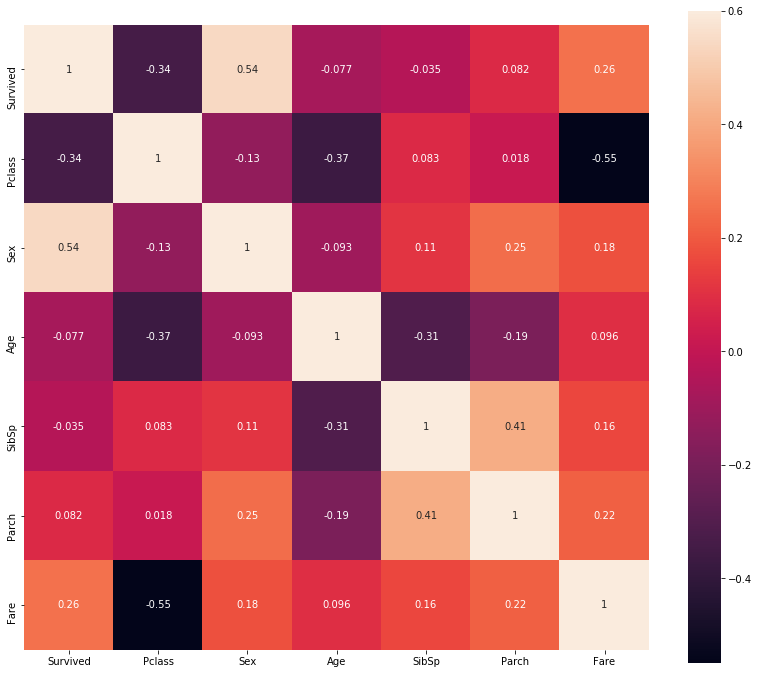

In [193]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)
data.corr()["Sex"]

It is obvious that Survive is strongly correlated with Sex and also Parch is somewhat correlated with Sex. This is consistent with hypothesis that children and women first. There is also noticeble negative correlation between PClass and Fare.

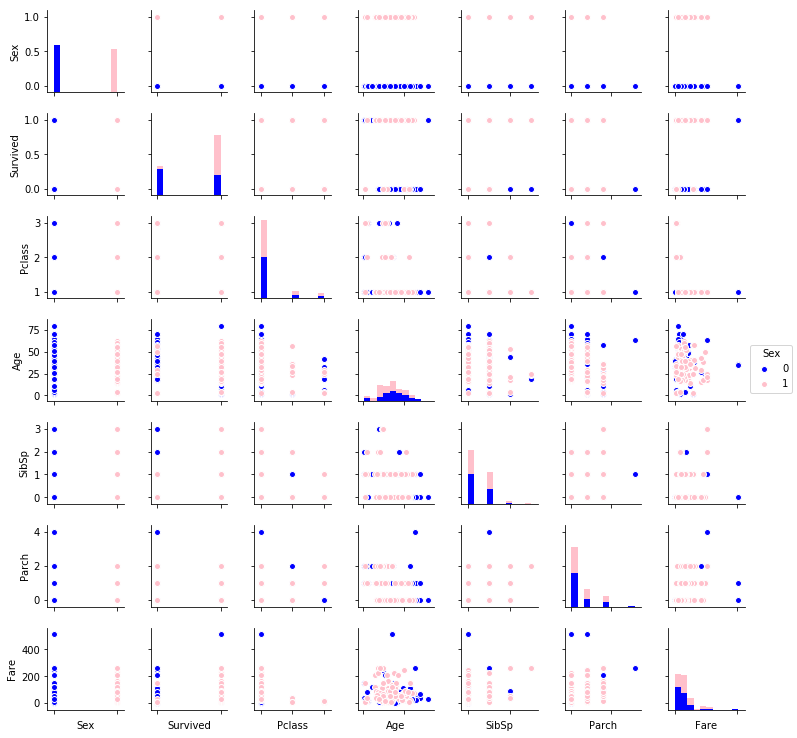

In [194]:
cols = ['Sex','Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=data.dropna(), vars=cols, size=1.5,
                 hue='Sex', palette=['blue','pink'])
g.set(xticklabels=[])

In [195]:
Feature engineering

SyntaxError: invalid syntax (<ipython-input-195-41abb8440116>, line 1)

In [196]:
Family size

SyntaxError: invalid syntax (<ipython-input-196-28285d54ca0a>, line 1)

In [197]:
data["FamilySize"] = data["SibSp"] + data["Parch"]+1
print(data["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [198]:
data['FamilySize'] = pd.cut(data['FamilySize'], 3, labels=["small", "medium", "big"])

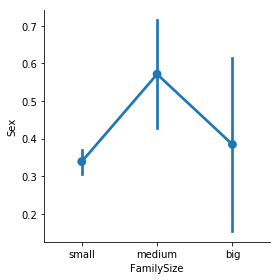

In [199]:
sns.factorplot(x="FamilySize", y="Sex", data=data);

It seems that this new variable might have some predictive power given that small family size seems to be more common for men than women.

In [200]:
Deck

NameError: name 'Deck' is not defined

In [201]:
data["Deck"]=data['Cabin'].str[0]
data["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [202]:
#data["Deck"]=data['Deck'].fillna('Miss', inplace=True)

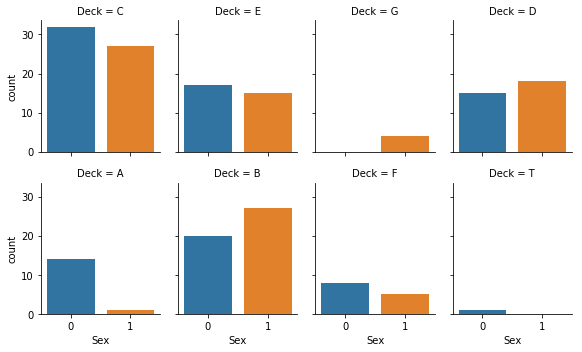

In [203]:
g = sns.factorplot("Sex", col="Deck", col_wrap=4,
                    data=data, kind="count", size=2.5, aspect=.8);

Completing features

There are only 3 values for Embarkement S, Q, C. The most simlple way would be to fill in the most common values which is S. However if we examine closely Fare and Class of passengers with missing Embarkement we see that they both paid 80 for 1. class.

In [204]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
61,1,1,1,38.0,0,0,113572,80.0,B28,NaN,small,B
829,1,1,1,62.0,0,0,113572,80.0,B28,NaN,small,B


Now, we can plot Fare and Pclass over Embarked and try to estimate port of Embarkement for the above passengers.

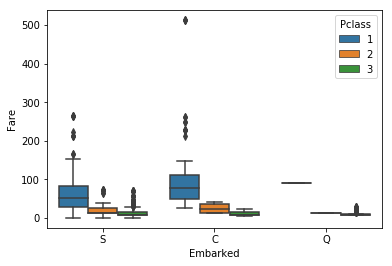

In [205]:
sns.boxplot(x="Embarked",y="Fare", hue="Pclass", data=data)

Majority of passengers paid 80 for 1. class in Embarkement C, so we can fill missing values with C.

In [206]:
data["Embarked"] = data["Embarked"].fillna('C')

There is 177 missing values for Age so it is possible to reasinobly make estimates about missing values. There are potentialy many possible ways of how to do it. Interesting one is to use some learning algorithm such Random Forest to predict missing values.

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      891 non-null object
FamilySize    891 non-null category
Deck          204 non-null object
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [210]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked', 'Deck']
data['Embarked']=labelEnc.fit_transform(data['Embarked'].astype(str))
data['Deck']=labelEnc.fit_transform(data['Deck'].astype(str))
data['FamilySize']=labelEnc.fit_transform(data['FamilySize'])    
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2,2,8
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,2,2
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,8
3,1,1,1,35.0,1,0,113803,53.1000,C123,2,2,2
4,0,3,0,35.0,0,0,373450,8.0500,NaN,2,2,8


In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
def fill_missing_age(df):
    dat = df[['Age','Survived', 'Pclass', 'SibSp', 'Parch',
                 'Fare', 'Embarked', 'Deck']]
    train  = dat.loc[(df['Age'].notnull())]
    test = dat.loc[(df['Age'].isnull()) ]
    y = train.values[:, 0]
    X = train.values[:, 1::]
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    predictedAges = rtr.predict(test.values[:, 1::])
    df.loc[(df['Age'].isnull()),'Age'] = predictedAges
    return df

In [213]:
data = fill_missing_age(data)

In [214]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2,2,8
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,2,2
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,2,8
3,1,1,1,35.0,1,0,113803,53.1000,C123,2,2,2
4,0,3,0,35.0,0,0,373450,8.0500,NaN,2,2,8


Feature engineering

In [216]:
data = data.drop(['Ticket', 'Cabin'], axis = 1)

In [217]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Deck
0,0,3,0,22.0,1,0,7.2500,2,2,8
1,1,1,1,38.0,1,0,71.2833,0,2,2
2,1,3,1,26.0,0,0,7.9250,2,2,8
3,1,1,1,35.0,1,0,53.1000,2,2,2
4,0,3,0,35.0,0,0,8.0500,2,2,8
